<a href="https://colab.research.google.com/github/mouhcine1911/welcome/blob/master/Copie_de_Fraudulent_Activities_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###OBJECTIF :

Nous avons une base de données de taille assez importante (lignes), qui contienne plusieurs variables (13). Exemple : signup_time : "le temps d'inscription", purchase_time : "le temps d'achats"...etc.

Le but de ce projet est de détecter les actions frauduleuses qui sont représentées dans la colonne de la variable catégorielle " class" : fraude / Pas_de_fraude.

Pour s'y entreprendre, il faut d'abord faire une analyse exploratoire des données, pour connaître par exemple les distributions de notre population selon l'âge, sex, pays... 

Ensuite, faire un preprocessing des données, à savoir, gérer les valeurs manquantes, transformer les données qualitatives à des données numériques à travers une dummification et, finalement normaliser les variables quantitatives afin d'avoir la même distribution des données.

L'étape suivante consiste à concevoir des modèles qui doivent être capable de repérer à l'avance les activités frauduleuses afin de les bloquer et par conséquent réduire le taux des activités frauduleuses.
Dans cette perspective, nous allons commencer avec un modèle de régression logistique, dans l’objectif de prédire le mieux possible les fraudes, et en fonction des scores, nous essayerons d’autres modèles jusqu’à trouver celui ou ceux qui généraliseront le mieux.  




In [0]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [124]:
from google.colab import files
uploaded = files.upload()

Saving df1_contry.csv to df1_contry (1).csv


In [0]:
df = pd.read_csv("df1_contry.csv") 

In [206]:
df.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [207]:
df.describe(include='all')

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
count,151112.000000,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000,151112
unique,NaN,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN,182
top,NaN,NaN,2015-05-27 17:01:10,2015-07-17 23:22:55,NaN,NGQCKIADMZORL,SEO,Chrome,M,NaN,NaN,NaN,United States
freq,NaN,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN,58049
mean,75555.500000,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646,NaN
std,43622.421276,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336,NaN
min,0.000000,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000,NaN
25%,37777.750000,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000,NaN
50%,75555.500000,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000,NaN
75%,113333.250000,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000,NaN


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 13 columns):
Unnamed: 0        151112 non-null int64
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
country           151112 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 15.0+ MB


###1- Analyse exploratoire

Il est interressant premierement de regarder la repartition des classes

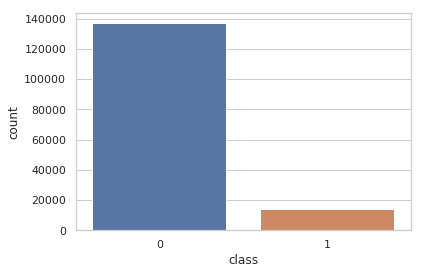

In [209]:
sns.countplot('class', data=df)

Le dataset est particulièrement déséquilibré.  il se composecomme suite : ( 0 : 90%  & 1 : 10% )

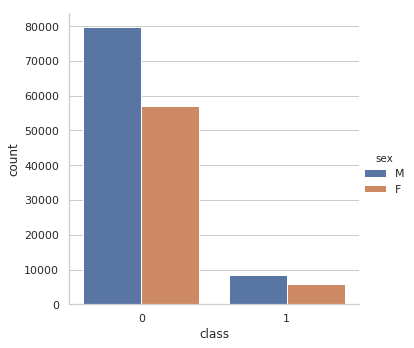

In [210]:
sns.catplot(x="class", hue="sex", kind="count", data=df)

La différence entre les valeurs (0 & 1) ne peut pas nous dire grande chose. Cette différence est dû au déséquilibre comme nous l'avons vu ci-dessus

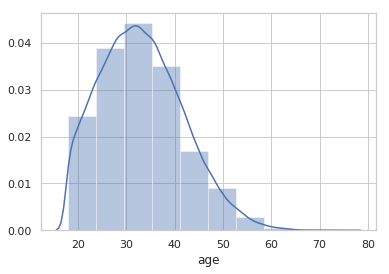

In [211]:
sns.set(style="whitegrid")
sns.distplot(df.age, bins=10)

Il n'y a pas de valeurs valeurs atypiques . La distribution ressemble largement à une distribution normale

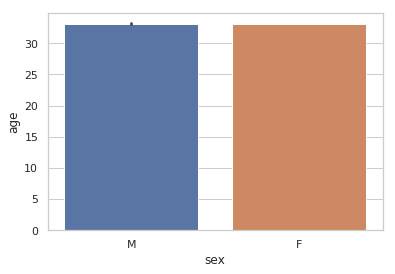

In [212]:
sns.barplot(x='sex', y="age", data = df)

La distribution du sex est quasiment le même dans le dataset. Il y a autant de femmes que des hommes. 

La source Direct est la moins représenté par rapport aux autres sources

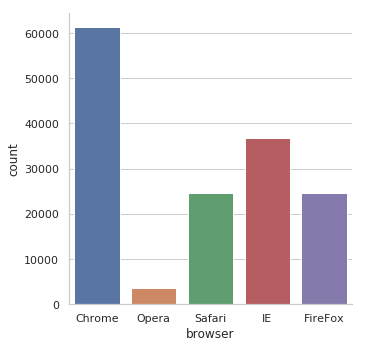

In [213]:
sns.catplot(x= 'browser', kind='count', data=df)

Google Chrome reste toujours le browser le plus utilisé par les internautes, contrairement à l'Opera, placé au bas de la liste

### On tente de regarder la repartition selon les classes, et selon les navigateurs webs.
###En effet il aurait pu être possible que selon le navigateur web la fraude soit plus facile

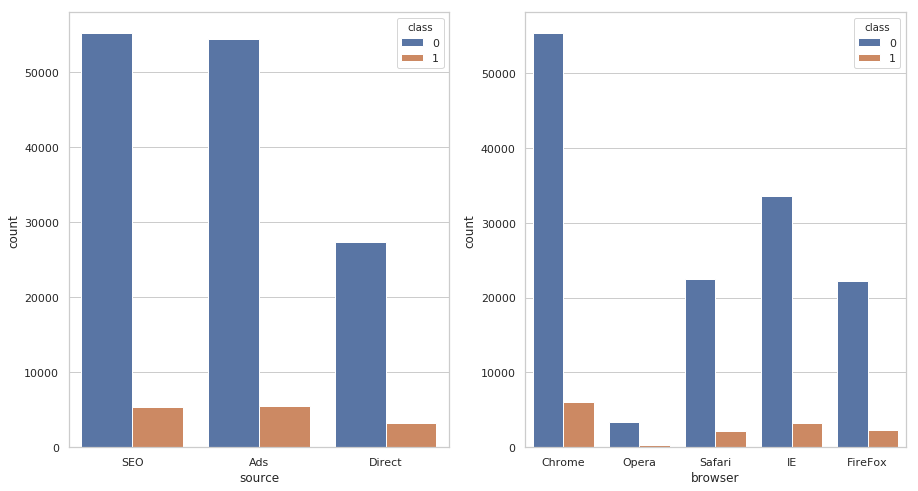

In [214]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

sns.countplot('source', hue='class', data=df, ax=ax[0])
sns.countplot('browser', hue='class', data=df, ax=ax[1])

Malheureusement rien ne sort de cette analyse

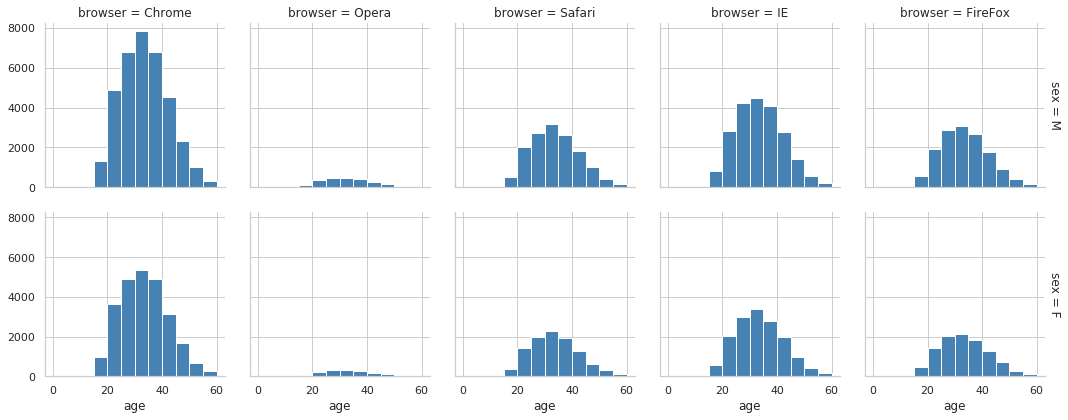

In [215]:
sns.set(style="whitegrid")
g = sns.FacetGrid(df, row="sex", col="browser", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "age", color="steelblue", bins=bins)

La distributions des âges reste presque la même sur tous les browsers, cela laisse croire qu'il n'y a pas de préfèrences de browser selon les âges, c'est plutôt les performances de cet outils qui comptent. 

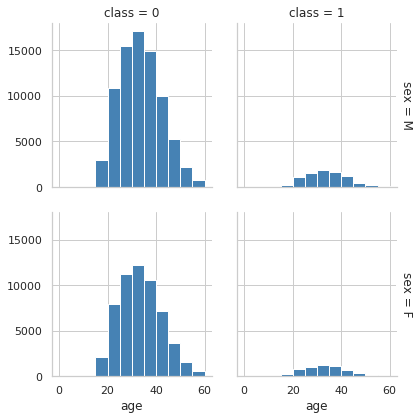

In [216]:
g = sns.FacetGrid(df, row="sex", col="class", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "age", color="steelblue", bins=bins)

Le graphique nous montre qu'il n'y a pas de tranche d'âge précise pour les fraudeurs, ils peuvent être de tous âges.

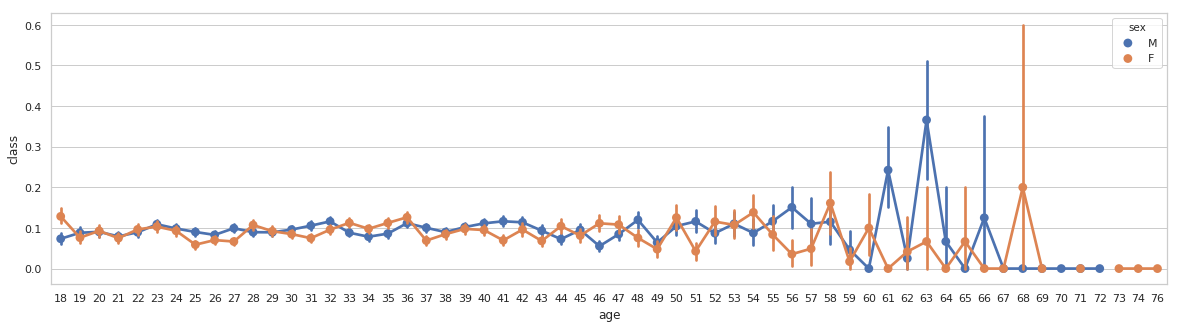

In [217]:
plt.subplots(sharey=True, figsize=(20, 5)) 
sns.pointplot(x="age", y="class", hue="sex", size="coherence", style="class", legend="full",data=df)

Pas grande chose à dire sur le sex et la fraude.

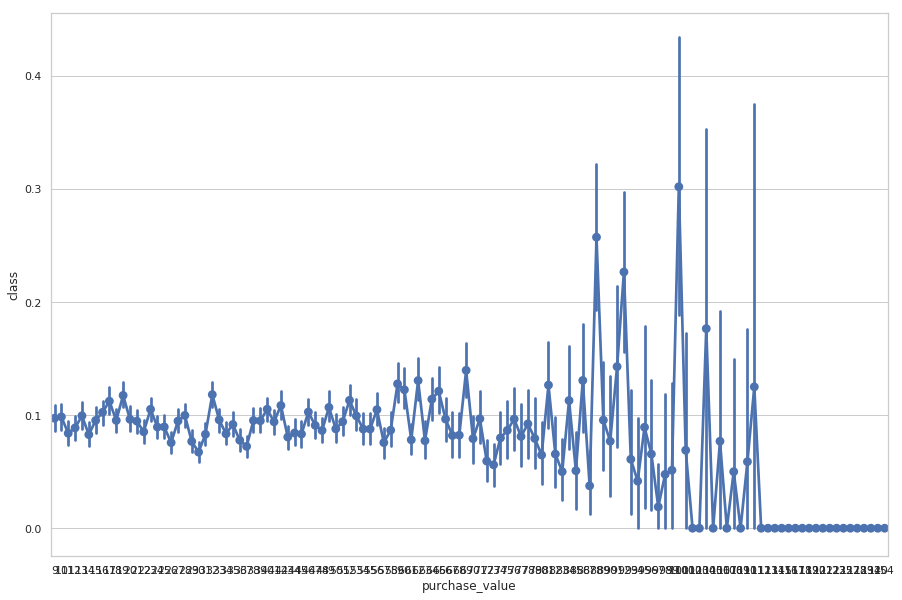

In [218]:
fig = plt.subplots(1,1,figsize=(15,10))
sns.pointplot(x='purchase_value',y='class', data=df, logistic=True)

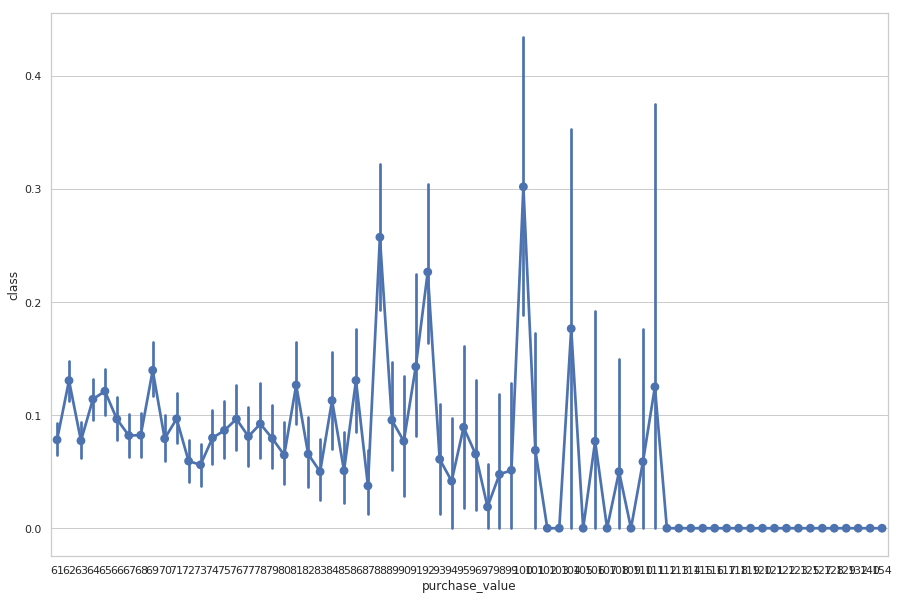

In [219]:
fig = plt.subplots(1,1,figsize=(15,10))
sns.pointplot(x = 'purchase_value', y='class', data=df[df['purchase_value'] > 60], logistic=True)

La courbe  ne nous apportent pas tant d'informations, cependantt, on remarque des pics autour de 80.



Regroupement des observations

In [220]:
a = df.groupby(df["class"])
a.mean()

# pour avoir la moyenne des ages des fraudeurs ==> pas de differances à signaler

,Unnamed: 0,user_id,purchase_value,age,ip_address
class,,,,,
0,75542.389052,200098.920123,36.929418,33.122356,2.154235e+09
1,75682.394813,200869.065366,36.993004,33.318281,2.131918e+09


In [221]:
df.groupby([pd.Grouper("sex"), 'class'])["age"].mean() 

sex  class
M    0        33.142914
     1        33.431231
F    0        33.093604
     1        33.151653
Name: age, dtype: float64

- La moyenne d'age pour les fraudeurs et les non fraudeurs est presque égale : 33 ans 
- Les valeurs d'achats son presque égales pour les fraudeurs et les non fraudeurs. Aux alentour de : 200098.00 à 200869.00

In [222]:
df.groupby(['sex', 'class']).size().reset_index()  # je voulais séparer les deux sex en fonction de class

,sex,class,0
0,F,0,57102
1,F,1,5717
2,M,0,79859
3,M,1,8434


La proportion des fraudeurs chez les hommes 0.095 et égale à celle chez les femmes 0.091

### Nous allons  classer les pays selon leur ratio de fraude (evidemment nous n'avons pas regardé les pays avec des petites occurences, nous classons d'abord les pays par rapport a leur importance dans dataset, puis nous regardons les ratios

<b><i>/!\ Il est important de convertir les NaN des pays en string, pour qu'ils soient considerer comme des potentiels fraudeurs<b> <i> /!\

In [223]:
df['country']=df.country.apply(lambda x : str(x)) 
df.country.head()

0            Japan
1    United States
2    United States
3          Unknown
4    United States
Name: country, dtype: object

In [224]:
fraude_rate_country = ((df[df['class']==1].groupby('country')['user_id'].count()/df.groupby('country')['user_id'].count()).sort_values( ascending=False)).reset_index()                            
fraude_rate_country = pd.DataFrame(fraude_rate_country)
fraude_rate_country.head(10)                                                                                                                                                    

,country,user_id
0,Turkmenistan,1.000000
1,Namibia,0.434783
2,Sri Lanka,0.419355
3,Luxembourg,0.388889
4,Virgin Islands (U.S.),0.333333
5,Ecuador,0.264151
6,Tunisia,0.262712
7,Peru,0.260504
8,Bolivia,0.245283
9,Kuwait,0.233333


In [225]:
fraude_rate_country.drop(columns=['user_id'],inplace=True)
fraude_rate_country.head()

,country
0,Turkmenistan
1,Namibia
2,Sri Lanka
3,Luxembourg
4,Virgin Islands (U.S.)


In [226]:
fraude_rate_country.head(20)

,country
0,Turkmenistan
1,Namibia
2,Sri Lanka
3,Luxembourg
4,Virgin Islands (U.S.)
5,Ecuador
6,Tunisia
7,Peru
8,Bolivia
9,Kuwait


Ci-dessus, nous avons le classement des pays frauduleux. Mais cela n'est pas solide, parce que nous n'avons pas le même poids pur chaque pays dans le dataset.


In [227]:
df["country"].head()

0            Japan
1    United States
2    United States
3          Unknown
4    United States
Name: country, dtype: object

In [228]:
pays  = df["country"].value_counts()/len(df.country)*100
pays.head()

# j'ai 14% de Unknown ==> Unknown se sont mes valeurs vides NaN

United States     38.414553
Unknown           14.536238
China              7.966277
Japan              4.834825
United Kingdom     2.971306
Name: country, dtype: float64

In [229]:
country_fraude = (df[df["class"]==1].groupby(["country"])["class"].sum()).reset_index()
country_fraude = country_fraude.sort_values(by='class', ascending=False)
country_fraude.head()  # Nous avons calculer le nombre des fraudes par pays

,country,class
103,United States,5551
104,Unknown,1883
17,China,1043
47,Japan,715
102,United Kingdom,477


In [230]:
df["class"].sum()   # je voudrai calculer le nombre des items dans la variable country


14151

In [231]:
country_fraude_rate = country_fraude["class"]/(df["class"].sum())   # je calcule le ratio de fraude par pays
country_fraude_rate.head()

103    0.392269
104    0.133065
17     0.073705
47     0.050526
102    0.033708
Name: class, dtype: float64

### On remarque que les Nan et les Uniteds States sont tres representés :


<b> ```38% pour les US avec 39 % de fraude``` et ```14% pour les unknown avec 13 % de fraude ``` </b>
Il serait alors peut etre interessant de réaliser des modèles specifiques aux Unknown et aux United States et le reste du dataframe differements



Préprocessing : 

1. Néttoyege du DataFrame et écrémage des NaN 

2. Dummification des varb quali 


In [0]:
df_US = df[df['country']=='United States']

In [0]:
df_nan = df[df['country']=='Unknown']

In [0]:
df_reste = df[(df['country']!='United States') & (df['country']!='Unknown')]

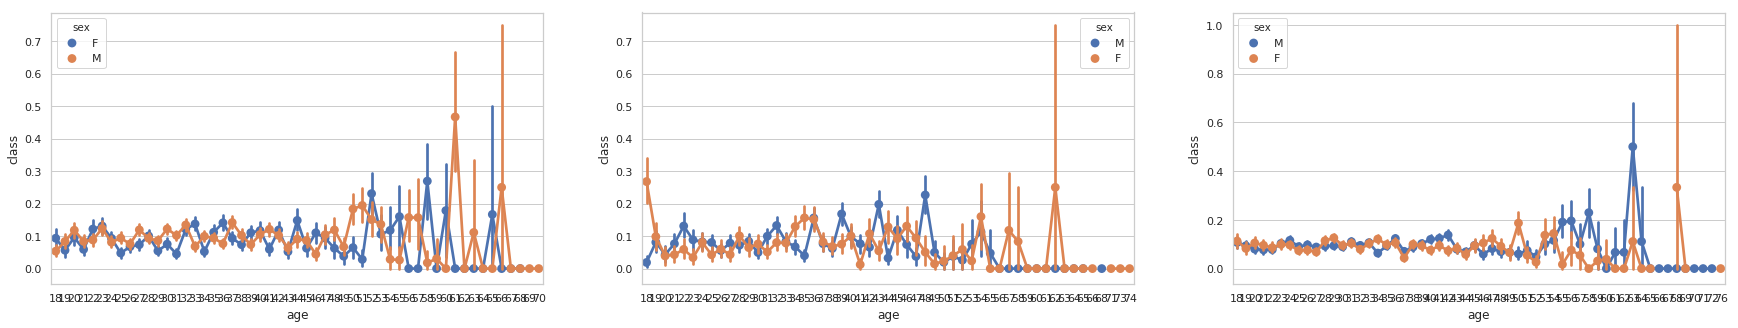

In [235]:
fig, ax = plt.subplots(1,3, figsize=(30, 5)) 

#fig, ax = plt.subplots(1,2,figsize=(15,8))



sns.pointplot(x="age", y="class", hue="sex", size="coherence", style="class", legend="full",data=df_US, ax=ax[0])
sns.pointplot(x="age", y="class", hue="sex", size="coherence", style="class", legend="full",data=df_nan, ax=ax[1])
sns.pointplot(x="age", y="class", hue="sex", size="coherence", style="class", legend="full",data=df_reste, ax=ax[2])

La tranche d'âge de 50 ans et + sont sucéptible à faires des activités frauduleuses plus que les jeunes 

 Rien d'incroyable selon les differents dataframes, cependant on remarque quand meme, que plus un device est utilisé, plus il y a des chances qu'il s'agisse d'une fraude



In [236]:
dev = pd.DataFrame(df.groupby('device_id')['user_id'].count())
dev = dev.sort_values(by="user_id", ascending=False)
dev.head(10)

,user_id
device_id,
KIPFSCNUGOLDP,20
NGQCKIADMZORL,20
CQTUVBYIWWWBC,20
ITUMJCKWEYNDD,20
EQYVNEGOFLAWK,20
ZUSVMDEZRBDTX,20
BWSMVSLCJXMCM,19
IGKYVZDBEGALB,19
EGLGSEGYPMMAM,19


On va créer  des categories pour les devices utilisés :

_ Safe : Les devices utilisés entre 1 et 3

_ Not Sure : Les devices utilisé 4 fois

_ Dangerous : Lles devices utilisé 5 fois ou plus



In [0]:
df['Alerte'] = df.user_id.apply(lambda x : 'safe' if x<=3 else ( 'not_sure' if x==4 else 'dangerous'))

In [238]:
df.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,Alerte
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,dangerous
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,dangerous
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,dangerous
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,dangerous
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,dangerous


In [239]:
df.country.shape

(151112,)

In [0]:
# je supprime les pays inconnus puisque l'on peut pas les localiser.


#df.country = df.country.dropna(["Unknown"]).sort_values(ascending=False)

#df = df[df.country != 'Unknown']

#METHODE 2
#df.drop(df.index[2])

In [0]:
#df.country.shape

In [0]:
#df.country.value_counts()

In [0]:
#df.country.isnull().sum()/len(df.country)*100

In [0]:
#df = df.country.fillna(0, inplace = True)

In [0]:
#df.country.isnull().sum()/len(df.country)*100

Traiter la variable Time

In [246]:
df.signup_time.head()

#la colonne a un format "object" je dois la convertir en format datetime

0    2015-02-24 22:55:49
1    2015-06-07 20:39:50
2    2015-01-01 18:52:44
3    2015-04-28 21:13:25
4    2015-07-21 07:09:52
Name: signup_time, dtype: object

In [0]:
# convertien format datetime

df['signup_time'] = pd.to_datetime(df['signup_time'])

In [248]:
df.signup_time.head()

0   2015-02-24 22:55:49
1   2015-06-07 20:39:50
2   2015-01-01 18:52:44
3   2015-04-28 21:13:25
4   2015-07-21 07:09:52
Name: signup_time, dtype: datetime64[ns]

In [249]:
df['purchase_time'].dtypes

dtype('O')

In [0]:
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

In [251]:
df['purchase_time'].head()

0   2015-04-18 02:47:11
1   2015-06-08 01:38:54
2   2015-01-01 18:52:45
3   2015-05-04 13:54:50
4   2015-09-09 18:40:53
Name: purchase_time, dtype: datetime64[ns]

Calculer la durée entre le temps de l'inscription et l'heure de l'achat

In [0]:
df["duration"] = df['purchase_time'] - df['signup_time']

In [253]:
df["duration"].head()

0   52 days 03:51:22
1    0 days 04:59:04
2    0 days 00:00:01
3    5 days 16:41:25
4   50 days 11:31:01
Name: duration, dtype: timedelta64[ns]

In [254]:
df.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,Alerte,duration
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,dangerous,52 days 03:51:22
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,dangerous,0 days 04:59:04
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,dangerous,0 days 00:00:01
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,dangerous,5 days 16:41:25
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,dangerous,50 days 11:31:01


Transformer duration en secondes pour avoir la meme norme et pour pouvoir l'entrainer dans un modele

In [0]:

df["duration_second"] = df["duration"].apply(lambda x: x.total_seconds())

In [256]:
df.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,Alerte,duration,duration_second
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,dangerous,52 days 03:51:22,4506682.0
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,dangerous,0 days 04:59:04,17944.0
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,dangerous,0 days 00:00:01,1.0
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,dangerous,5 days 16:41:25,492085.0
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,dangerous,50 days 11:31:01,4361461.0


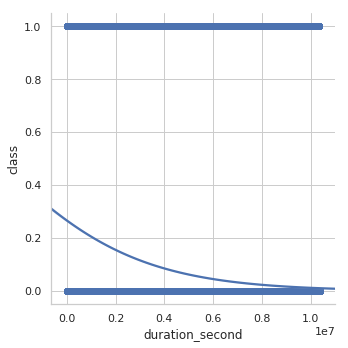

In [257]:
sns.set(style="whitegrid")
sns.lmplot(x='duration_second', y='class', logistic=True, data=df)


# plus la durée entre l'inscription et l'achat est courte, plus il y a des possibilités de fraude (35%)

Séparer les horaires selon les périodes de la journées

In [0]:
df['period'] = pd.cut(df.purchase_time.dt.hour,
              [0,6,12,18,24],
              labels=['Night','Morning','Afternoon','Evening'],
              include_lowest=True)

In [259]:
df.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,Alerte,duration,duration_second,period
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,dangerous,52 days 03:51:22,4506682.0,Night
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,dangerous,0 days 04:59:04,17944.0,Night
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,dangerous,0 days 00:00:01,1.0,Afternoon
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,dangerous,5 days 16:41:25,492085.0,Afternoon
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,dangerous,50 days 11:31:01,4361461.0,Afternoon


Calculer la durée entre le temps de l'inscription et le temps de l'achat, en jours, en heures, en minutes et en secondes

In [0]:
df['diff_jours'] = df['duration'].apply(lambda x : x.days)
df['diff_heures'] = df['duration'].apply(lambda x : x.components.hours)
df['diff_minutes'] = df['duration'].apply(lambda x : x.components.minutes)
df['diff_secondes'] = df['duration'].apply(lambda x : x.components.seconds)

In [261]:
df.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,Alerte,duration,duration_second,period,diff_jours,diff_heures,diff_minutes,diff_secondes
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,dangerous,52 days 03:51:22,4506682.0,Night,52,3,51,22
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,dangerous,0 days 04:59:04,17944.0,Night,0,4,59,4
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,dangerous,0 days 00:00:01,1.0,Afternoon,0,0,0,1
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,dangerous,5 days 16:41:25,492085.0,Afternoon,5,16,41,25
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,dangerous,50 days 11:31:01,4361461.0,Afternoon,50,11,31,1


Nettoyer mon DataFrame et garder que les variables utiles

In [0]:

df['country'] = df['country'].str.replace('Unknown', 'nan')        

In [263]:
df['country'].value_counts()

United States                      58049
nan                                21966
China                              12038
Japan                               7306
United Kingdom                      4490
Korea Republic of                   4162
Germany                             3646
France                              3161
Canada                              2975
Brazil                              2961
Italy                               1944
Australia                           1844
Netherlands                         1680
Russian Federation                  1616
India                               1310
Taiwan; Republic of China (ROC)     1237
Mexico                              1121
Sweden                              1090
Spain                               1027
South Africa                         838
Switzerland                          785
Poland                               729
Argentina                            661
Indonesia                            649
Norway          

In [264]:
df_new = df.drop(['Unnamed: 0', 'user_id', 'signup_time', 'purchase_time',"device_id", "ip_address", "duration"], axis=1)
df_new.head()

,purchase_value,source,browser,sex,age,class,country,Alerte,duration_second,period,diff_jours,diff_heures,diff_minutes,diff_secondes
0,34,SEO,Chrome,M,39,0,Japan,dangerous,4506682.0,Night,52,3,51,22
1,16,Ads,Chrome,F,53,0,United States,dangerous,17944.0,Night,0,4,59,4
2,15,SEO,Opera,M,53,1,United States,dangerous,1.0,Afternoon,0,0,0,1
3,44,SEO,Safari,M,41,0,nan,dangerous,492085.0,Afternoon,5,16,41,25
4,39,Ads,Safari,M,45,0,United States,dangerous,4361461.0,Afternoon,50,11,31,1


In [265]:
df_new.isnull().sum()/len(df_new)

purchase_value     0.0
source             0.0
browser            0.0
sex                0.0
age                0.0
class              0.0
country            0.0
Alerte             0.0
duration_second    0.0
period             0.0
diff_jours         0.0
diff_heures        0.0
diff_minutes       0.0
diff_secondes      0.0
dtype: float64

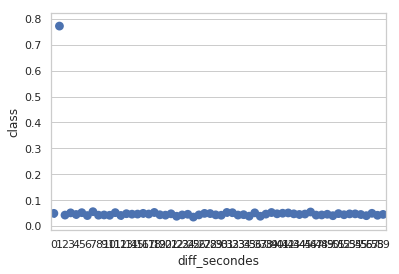

In [266]:
#f, ax = plt.subplots(1,1,figsize=(10,10))
sns.pointplot(x='diff_secondes', y ='class', logistic=True, data=df, join=None)

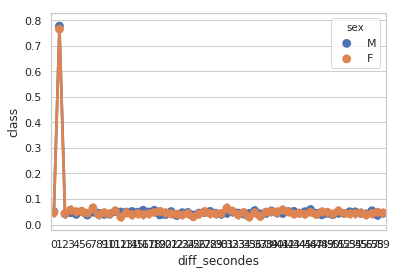

In [268]:
sns.pointplot(x='diff_secondes', y='class', hue="sex",logistic = True, data=df_new)

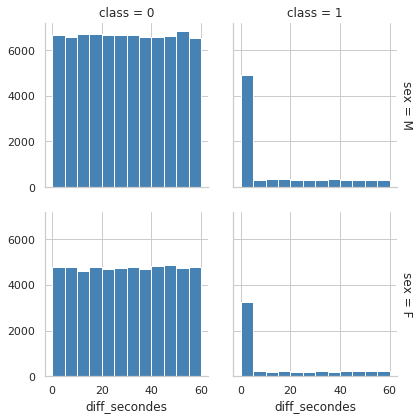

In [270]:
g = sns.FacetGrid(df_new, row="sex", col="class", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "diff_secondes", color="steelblue", bins=bins)

Les fraudes sont souvent faites tout juste après l'inscrription

Le DataFrame et très deséquilibré : ( class 0 = 90%  &  class 1 = 10%)

---> il faut prendre un échantillant par exemple de 50% 50%

In [0]:
#fraude = pd.DataFrame(df_new[df_new["class"] == 1])
#fraude.shape
#no_fraude = pd.DataFrame(df_new[df_new["class"] == 0].sample(len(fraude))                  

In [0]:
#no_fraude = pd.DataFrame(df_new[df_new["class"] == 0].sample(len(fraude)))               
#no_fraude.shape                         

In [0]:
#dataset = pd.concat([fraude,no_fraude])

In [0]:
# ils se sont bien concatenés 

#dataset.shape

Je sépare mes variables quali et quanti

    1- Normaliser les variables numériques 
    2- Dummifier les variables caté*goriques*

In [0]:
#dataset.head(3)

In [0]:
#dataset.columns

In [0]:
#df_num = pd.DataFrame(dataset[['purchase_value', 'age', 'duration']])
#df_num.head()

In [0]:
#df_cat = pd.DataFrame(dataset[['source', 'browser', 'sex', 'country']])
#df_cat.head()

Dummifier mes variables quali

In [0]:
#df_cat_dummy = pd.get_dummies(df_cat, drop_first = True) # il faut ajouter pd.get_dummies(df_cat, drop_first = True, dummy_nan = True) pour prendre de l'info sur les pays Unknown aussi 
# et ne pas perdre de l'info sur eux
#df_cat_dummy.head()

2- Construisez un modèle qui permette de prédire si l'activité est frauduleuse ou non. Expliquez aussi vos choix / hypothèses en termes d'optimisation de faux-positifs et faux-négatifs

Séparation des variables X de ma variable cible y

In [0]:
#X = dataset.drop(["class"], axis=1)
#y = dataset["class"]

In [0]:
#from sklearn.model_selection import train_test_split
#X_train_num, X_test_num, X_train_cat, X_test_cat, y_train, y_test = train_test_split(df_num, df_cat_dummy, y, test_size=0.3, stratify = y)

Normalisation des variables quanti


In [0]:
#from sklearn.preprocessing import StandardScaler
#sc_x = StandardScaler()
#X_train_num = pd.DataFrame(sc_x.fit_transform(X_train_num), columns = df_num.columns, index = X_train_num.index)
#X_test_num = pd.DataFrame(sc_x.transform(X_test_num), columns = df_num.columns, index = X_test_num.index)

In [0]:
#X_train_num.head()

Regrouper les variables quali et quanti

In [0]:
#X_train = pd.merge(X_train_num, X_train_cat, left_index=True, right_index=True)
#X_test = pd.merge(X_test_num, X_test_cat, left_index=True, right_index=True)

In [0]:
# il faut essayer de faire un sample pour X_train, y_train afin pour entrainer 10% 90% comme le dataset initial

In [0]:
df_new = pd.get_dummies(df_new, drop_first=True, dummy_na=True)

In [287]:
df_new.head()

,purchase_value,age,class,duration_second,diff_jours,diff_heures,diff_minutes,diff_secondes,source_Direct,source_SEO,source_nan,browser_FireFox,browser_IE,browser_Opera,browser_Safari,browser_nan,sex_M,sex_nan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bonaire; Sint Eustatius; Saba,country_Bosnia and Herzegowina,...,country_Slovenia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Taiwan; Republic of China (ROC),country_Tajikistan,country_Tanzania United Republic of,country_Thailand,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,country_nan,country_nan,Alerte_not_sure,Alerte_safe,Alerte_nan,period_Morning,period_Afternoon,period_Evening,period_nan
0,34,39,0,4506682.0,52,3,51,22,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16,53,0,17944.0,0,4,59,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,53,1,1.0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44,41,0,492085.0,5,16,41,25,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,39,45,0,4361461.0,50,11,31,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_new, test_size=0.3, stratify = df_new['class']) #  df_new["class"] au lieu de y car j'ai pas défini y auparavant

In [289]:
train.head(3)

,purchase_value,age,class,duration_second,diff_jours,diff_heures,diff_minutes,diff_secondes,source_Direct,source_SEO,source_nan,browser_FireFox,browser_IE,browser_Opera,browser_Safari,browser_nan,sex_M,sex_nan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bonaire; Sint Eustatius; Saba,country_Bosnia and Herzegowina,...,country_Slovenia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Taiwan; Republic of China (ROC),country_Tajikistan,country_Tanzania United Republic of,country_Thailand,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,country_nan,country_nan,Alerte_not_sure,Alerte_safe,Alerte_nan,period_Morning,period_Afternoon,period_Evening,period_nan
50599,18,21,0,8068992.0,93,9,23,12,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
47467,31,31,0,5246844.0,60,17,27,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73677,16,22,0,5863965.0,67,20,52,45,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [290]:
test.head(3)

,purchase_value,age,class,duration_second,diff_jours,diff_heures,diff_minutes,diff_secondes,source_Direct,source_SEO,source_nan,browser_FireFox,browser_IE,browser_Opera,browser_Safari,browser_nan,sex_M,sex_nan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bonaire; Sint Eustatius; Saba,country_Bosnia and Herzegowina,...,country_Slovenia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Taiwan; Republic of China (ROC),country_Tajikistan,country_Tanzania United Republic of,country_Thailand,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,country_nan,country_nan,Alerte_not_sure,Alerte_safe,Alerte_nan,period_Morning,period_Afternoon,period_Evening,period_nan
34115,28,31,0,8156884.0,94,9,48,4,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
39243,52,26,0,1973900.0,22,20,18,20,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
29146,20,35,1,1.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [0]:
train_class_1 = pd.DataFrame(train.loc[train["class"] == 1])
train_class_0 = pd.DataFrame(train.loc[train["class"] == 0]).sample(len(train_class_1))

In [0]:
train_new = pd.concat([train_class_1,train_class_0])

In [293]:
train_new.head(3)

,purchase_value,age,class,duration_second,diff_jours,diff_heures,diff_minutes,diff_secondes,source_Direct,source_SEO,source_nan,browser_FireFox,browser_IE,browser_Opera,browser_Safari,browser_nan,sex_M,sex_nan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bonaire; Sint Eustatius; Saba,country_Bosnia and Herzegowina,...,country_Slovenia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Taiwan; Republic of China (ROC),country_Tajikistan,country_Tanzania United Republic of,country_Thailand,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,country_nan,country_nan,Alerte_not_sure,Alerte_safe,Alerte_nan,period_Morning,period_Afternoon,period_Evening,period_nan
118797,46,39,1,7756904.0,89,18,41,44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64900,24,26,1,8688752.0,100,13,32,32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
65178,46,45,1,1.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train = train_new.drop(["class"], axis=1)
y_train = train_new["class"] 

In [0]:
X_test = test.drop(["class"], axis=1)
y_test = test["class"] 

In [296]:
X_test.head()

,purchase_value,age,duration_second,diff_jours,diff_heures,diff_minutes,diff_secondes,source_Direct,source_SEO,source_nan,browser_FireFox,browser_IE,browser_Opera,browser_Safari,browser_nan,sex_M,sex_nan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bonaire; Sint Eustatius; Saba,country_Bosnia and Herzegowina,country_Botswana,...,country_Slovenia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Taiwan; Republic of China (ROC),country_Tajikistan,country_Tanzania United Republic of,country_Thailand,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,country_nan,country_nan,Alerte_not_sure,Alerte_safe,Alerte_nan,period_Morning,period_Afternoon,period_Evening,period_nan
34115,28,31,8156884.0,94,9,48,4,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
39243,52,26,1973900.0,22,20,18,20,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
29146,20,35,1.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
38648,51,35,9036847.0,104,14,14,7,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
148971,16,20,3784282.0,43,19,11,22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [298]:
X_train

array([[ 0.49036418,  0.66748942,  1.14093096, ..., -0.59289515,
        -0.50249095,  0.        ],
       [-0.70450426, -0.83485176,  1.41059887, ..., -0.59289515,
         1.99008559,  0.        ],
       [ 0.49036418,  1.36087766, -1.10384274, ..., -0.59289515,
        -0.50249095,  0.        ],
       ...,
       [-0.86744087,  0.89861884, -0.48641402, ..., -0.59289515,
        -0.50249095,  0.        ],
       [ 0.43605198,  2.0542659 ,  1.63145675, ..., -0.59289515,
        -0.50249095,  0.        ],
       [ 1.52229601,  0.43636001,  1.57533757, ..., -0.59289515,
        -0.50249095,  0.        ]])

**MODELE** 1 : Logistic Regression 

In [299]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [300]:
classifier.score(X_test, y_test)

0.7705033749503684

####Score moyen sur une cross-validation avec K=10

In [301]:
from sklearn.model_selection import cross_val_score
#cross_val_score(classifier,X, y, cv=10)#.std()
cross_val_score(classifier, X_test, y_test, cv=10).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.9545593983621948

In [0]:
y_pred = classifier.predict(X_test)

####Matrice de confusion pour vos prédictions sur l’échantillon de test et d’apprentissage

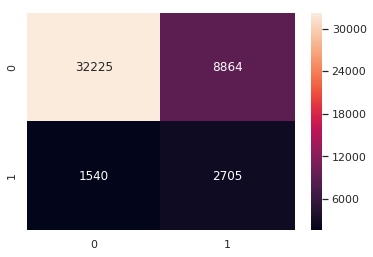

In [303]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

**MODELE** 2 : SVM


In [304]:
from sklearn import svm
sv = svm.SVC(gamma='scale')
sv.fit(X_train, y_train)
sv.score(X_test, y_test)

0.9321039396479464

**MODELE** 3 : Arbre de décision

In [305]:
from sklearn.tree import DecisionTreeClassifier
classifier_trees = DecisionTreeClassifier()
classifier_trees.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [306]:
classifier_trees.score(X_test, y_test)

0.6767547536065646

**MODELE** 4 : Essayons d'améliorer notre score. Nous allons faire une Random Forest avec 100 arbres de decision

In [307]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
rf_classifier.score(X_test, y_test)

0.9464860810870428

Refaire le modèle avec uniquement 20 arbres 

In [308]:
rf_classifier = RandomForestClassifier(n_estimators=20)
rf_classifier.fit(X_train, y_train)
rf_classifier.score(X_test, y_test)

0.9136189173688622

**Grid Search** pour trouver le nombre optimum d'arbres 

In [309]:
from sklearn.model_selection import GridSearchCV
params = {"n_estimators": range(20, 60)}

classifier = GridSearchCV(cv=3, estimator=rf_classifier, scoring="accuracy", n_jobs=-1, verbose=1, param_grid=params).fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.7min finished


In [310]:
classifier.best_params_

{'n_estimators': 54}

In [311]:
classifier.best_estimator_.score(X_test, y_test)

0.9374200379406186

In [0]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[("DecisionTreeClassifier", classifier_trees),("Random Forest",rf_classifier),("LogisticRegression",classifier),("SVM",sv)], 
                           voting='hard', 
                           n_jobs=-1)

votingC = votingC.fit(X_train, np.ravel(y_train))

In [317]:
votingC.score(X_test, y_test)

0.951802179379715